# 2. Sistemas Lineales Inveriantes en el Tiempo

In [1]:
import numpy             as np
import scipy             as sp
import matplotlib.pyplot as plt

from scipy import signal

In [51]:
#definir funcion
def plot_bode(Hs,color='b'):
    w, mag, phas = signal.bode(Hs)
    plt.figure('Magnitud')
    plt.semilogx(w, mag, color,linewidth=3)
    plt.grid('on')
    plt.figure('Fase')
    plt.semilogx(w, np.unwrap(phas), color, linewidth=3)
    plt.grid('on')
    
    return plt

## 2.1. Función de Transferencia
Los sistemas lineales invariantes en el tiempo continúo se describen a través de su función de transferencia $H(s)$ donde $s\in\mathbb{C}: s = \sigma+j\omega$; al mismo tiempo $\sigma,\omega\in\mathbb{R}$.

La función de transferencia $H(s):\mathbb{C}\rightarrow \mathbb{C}$ se define como
$$H(s)=\dfrac{Y(s)}{X(s)}=\dfrac{ \sum_{i=0}^N a_i s^i }{ b_0 + \sum_{j=1}^M b_j s^j }: b_0\neq 0$$

Es decir $H(s)$ se puede representar como 
$$$$


\begin{aligned}
  H(s)   &= A\exp^{\left(j\, \theta \right)}\\
  A      &= \sqrt{\sigma^2+\omega^2}\\
  \theta &= \arctan\left( \dfrac{\omega}{\sigma} \right)
\end{aligned}


Cualquier función $G(s)$ de variable compleja puede expresarse como
$$G(s) = \left|G(s)\right|e^{j\, \theta\left(G(s)\right)}$$

donde 

\begin{aligned}
 \left|G(s)\right| &=\sqrt{Re(G(s))^2+Im(G(s))^2}\\ 
 \theta\left(G(s)\right) =& \arctan\left( \dfrac{Im(G(s))}{Re(G(s))} \right)
\end{aligned}

Por lo tanto
$$H(s)=\dfrac{Y(s)}{X(s)}=\dfrac{  \left|Y(s)\right|e^{j\, \theta\left(Y(s)\right)}  }{  \left|X(s)\right|e^{j\, \theta\left(X(s)\right)} } = \dfrac{\left|Y(s)\right|}{\left|X(s)\right|}e^{ {j\theta\left(Y(s)\right) - j\theta\left(X(s)\right)} } $$

Tomando en cuenta únicamente la contribución de la frecuencia, es decir $\sigma=0\implies s=j\omega$

$$H(s) = \dfrac{\left|Y(j\omega)\right|}{\left|X(j\omega)\right|}e^{ {j\theta\left(Y(j\omega)\right) - j\theta\left(X(j\omega)\right)} } $$

**Ejemplo:** Análsisis de la función de transferencia $$H(s)=\dfrac{1}{s+1}$$

In [52]:
num = [1]
den = [1, 1]
#TODO variar en clase
Hs  = signal.TransferFunction(num, den)

print Hs.num
print Hs.den

p = np.poly1d( den )
print( np.poly1d(p,variable='s') )

[ 1.]
[ 1.  1.]
 
1 s + 1


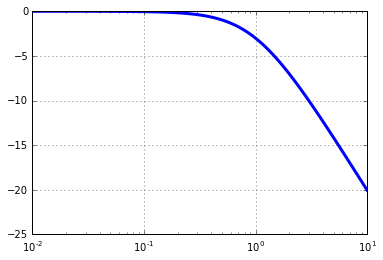

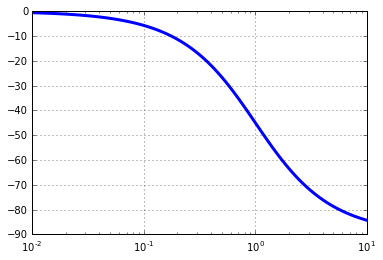

In [53]:
plot_bode(Hs)
plt.show()

**Ejemplo:** Análsisis de la función de transferencia $$H(s)=\dfrac{s}{s+1}$$

In [54]:
num = [1, 0]
den = [1, 10]
Hs  = signal.TransferFunction(num, den)
#TODO variar en clase

print Hs.num
print Hs.den

n,d = np.poly1d( num ), np.poly1d( den )
print( np.poly1d(n,variable='s') )
print( np.poly1d(d,variable='s') )



[ 1.  0.]
[  1.  10.]
 
1 s
 
1 s + 10


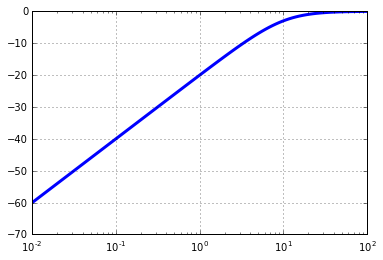

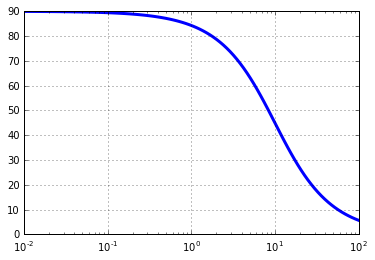

In [55]:
plot_bode(Hs)
plt.show()

**Ejemplo:** Análsisis de la función de transferencia $$H(s)=\dfrac{1}{s^2+\sqrt{2}s+1}$$

In [64]:
num = [1]
den = [ 1, np.sqrt(2), 1 ]
#TODO variar en clase

Hs  = signal.TransferFunction(num, den)

print Hs.num
print Hs.den

n,d = np.poly1d( num ), np.poly1d( den )
print( np.poly1d(n,variable='s') )
print( np.poly1d(d,variable='s') )

[ 1.]
[ 1.          1.41421356  1.        ]
 
1
   2
1 s + 1.414 s + 1


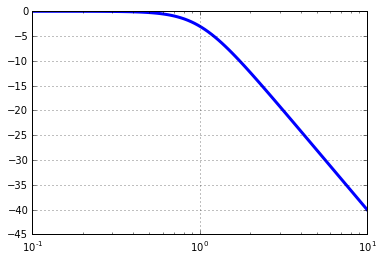

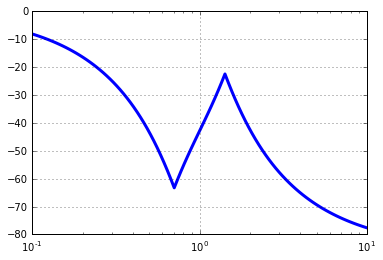

In [65]:
plt = plot_bode(Hs)
plt.show()

In [11]:
num   = [1]
den_a = [ 1, 0.765, 1 ]
p_a   = np.poly1d( den_a )

print np.poly1d(p_a) 

Hs  = signal.TransferFunction(num, p_a.coef)
plt = plot_bode(Hs,'g')

   2
1 x + 0.765 x + 1


In [12]:
den_b = [ 1, 1.848, 1 ]
p_b   = np.poly1d( den_b )

print np.poly1d(p_b) 

Hs   = signal.TransferFunction(num, p_b.coef)
plt1 = plot_bode(Hs,'b')

   2
1 x + 1.848 x + 1


In [13]:
print np.poly1d(p_a*p_b)

Hs  = signal.TransferFunction(num, (p_a*p_b).coef)
plt2 = plot_bode(Hs,'r')

   4         3         2
1 x + 2.613 x + 3.414 x + 2.613 x + 1


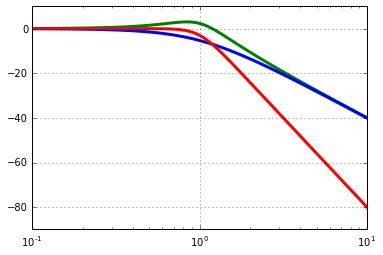

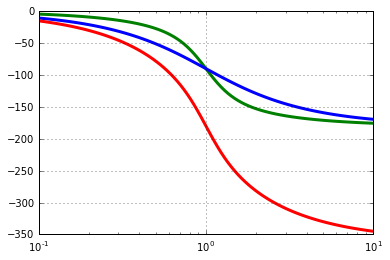

In [14]:
plt .show()
plt1.show()
plt2.show()

In [15]:
print p_a.r, np.absolute(p_a.r), np.angle(p_a.r)
print ''
print p_b.r, np.absolute(p_b.r), np.angle(p_b.r)

[-0.3825+0.92395549j -0.3825-0.92395549j] [ 1.  1.] [ 1.96329687 -1.96329687]

[-0.924+0.38239247j -0.924-0.38239247j] [ 1.  1.] [ 2.74920849 -2.74920849]


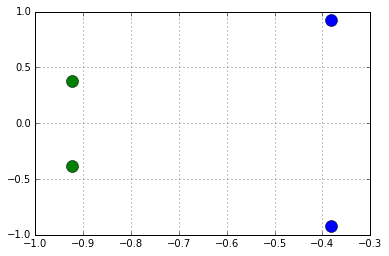

In [16]:
plt.plot( p_a.r.real, p_a.r.imag,'o',markersize=12 )
plt.plot( p_b.r.real, p_b.r.imag,'o',markersize=12 )

plt.grid('on')
plt.show()
